In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('data/raw/train_taxi_tims_U.csv',encoding='cp949')

/var/folders/tg/ntvm9wc94h937xqtzftck9xc0000gn/T/ipykernel_6324/2216033192.py:8: DtypeWarning: Columns (1,5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/raw/train_taxi_tims_U.csv',encoding='cp949')


In [2]:
df.head()

,차량이름,승차시간,승차요일,승차X좌표,승차Y좌표,하차시간,하차X좌표,하차Y좌표,승차거리(m),할증여부,요금
0,xqbxch,NaN,Tuesday,127.367251,36.349866,20230620110821,127.367251,36.349866,0.00,미할증,3300
1,xqbxch,NaN,Tuesday,127.367263,36.349684,20230620111100,127.367263,36.349684,0.00,미할증,3300
2,xqbxch,NaN,Tuesday,0.000000,0.000000,20230620221810,127.343552,36.294073,8743.06,미할증,10300
3,xqbxch,NaN,Tuesday,127.340568,36.298811,20230620222720,127.350915,36.305854,1518.13,미할증,3300
4,xqbxch,NaN,Tuesday,127.351858,36.299839,20230620224715,127.374955,36.345087,7045.65,미할증,8000


In [3]:
# 사용 전 인스턴스 개수 출력
print("Before dropping NaN instances:", len(df))

# NaN 값을 가진 인스턴스 삭제
df.dropna(inplace=True)

# 사용 후 인스턴스 개수 출력
print("After dropping NaN instances:", len(df))

Before dropping NaN instances: 1156344
After dropping NaN instances: 566520


In [4]:
df.head()

,차량이름,승차시간,승차요일,승차X좌표,승차Y좌표,하차시간,하차X좌표,하차Y좌표,승차거리(m),할증여부,요금
393216,fcivmp,1970-01-01 05:37:11,Thursday,127.431169,36.349082,19700101053711,127.432874,36.330697,2618.33,미할증,5800
393217,mceayy,1970-01-01 05:37:11,Thursday,127.319037,36.363290,19700101053711,127.301159,36.337313,5102.27,미할증,8200
393218,vspxqy,1970-01-01 05:37:11,Thursday,127.314859,36.391744,19700101053711,127.350051,36.302253,12705.35,미할증,14400
393219,xqbsmx,1970-01-01 05:37:11,Thursday,127.369546,36.349814,19700101053711,127.382217,36.336760,2396.42,미할증,5200
393220,dmdlpm,1970-01-01 05:37:11,Thursday,127.377504,36.354857,19700101053711,127.356460,36.355071,2822.74,미할증,5600


In [5]:
# '승차시간'을 datetime 형식으로 변환
df['승차시간'] = pd.to_datetime(df['승차시간'])

# 년도가 2023 또는 2024가 아닌 인스턴스 삭제
df = df[df['승차시간'].dt.year.isin([2023, 2024])]

# 삭제 후 인스턴스 개수 출력
print("After deleting instances:", len(df))

After deleting instances: 558743


In [6]:
df.head()

,차량이름,승차시간,승차요일,승차X좌표,승차Y좌표,하차시간,하차X좌표,하차Y좌표,승차거리(m),할증여부,요금
400993,gouhxp,2023-03-31 23:41:17,Friday,127.314748,36.391978,2023-04-01 00:04:32,127.249854,36.508528,15313.0,2,18100
400994,hzdykr,2023-03-31 23:49:29,Friday,127.432939,36.331904,2023-04-01 00:06:57,127.333850,36.336123,11321.0,1,12260
400995,bfllzp,2023-04-01 00:04:45,Saturday,127.336672,36.307763,2023-04-01 00:11:28,127.345800,36.323435,2531.0,1,5040
400996,clspqc,2023-04-01 00:06:20,Saturday,127.411853,36.336721,2023-04-01 00:12:18,127.420696,36.346687,2086.0,1,4680
400997,dmpnpp,2023-04-01 00:05:10,Saturday,127.434345,36.328179,2023-04-01 00:13:34,127.461915,36.330595,3682.0,1,6120


In [7]:
df['할증여부'] = df['할증여부'].replace('미할증', 0)

In [8]:
# '승차시간'과 '하차시간'을 datetime으로 변환 (형식 지정, 잘못된 값은 NaT로 변환)
df['승차시간'] = pd.to_datetime(df['승차시간'], errors='coerce')
df['하차시간'] = pd.to_datetime(df['하차시간'], errors='coerce')

# '주행시간' 계산 및 새로운 열에 저장
df['주행시간'] = df['하차시간'] - df['승차시간']

In [9]:
# '주행시간'을 초 단위의 실수로 변환하여 '주행시간_초' 열에 저장
df['주행시간_초'] = df['주행시간'].dt.total_seconds()

In [10]:
df.head()

,차량이름,승차시간,승차요일,승차X좌표,승차Y좌표,하차시간,하차X좌표,하차Y좌표,승차거리(m),할증여부,요금,주행시간,주행시간_초
400993,gouhxp,2023-03-31 23:41:17,Friday,127.314748,36.391978,2023-04-01 00:04:32,127.249854,36.508528,15313.0,2,18100,0 days 00:23:15,1395.0
400994,hzdykr,2023-03-31 23:49:29,Friday,127.432939,36.331904,2023-04-01 00:06:57,127.333850,36.336123,11321.0,1,12260,0 days 00:17:28,1048.0
400995,bfllzp,2023-04-01 00:04:45,Saturday,127.336672,36.307763,2023-04-01 00:11:28,127.345800,36.323435,2531.0,1,5040,0 days 00:06:43,403.0
400996,clspqc,2023-04-01 00:06:20,Saturday,127.411853,36.336721,2023-04-01 00:12:18,127.420696,36.346687,2086.0,1,4680,0 days 00:05:58,358.0
400997,dmpnpp,2023-04-01 00:05:10,Saturday,127.434345,36.328179,2023-04-01 00:13:34,127.461915,36.330595,3682.0,1,6120,0 days 00:08:24,504.0


In [11]:
# 사용 전 인스턴스 개수 출력
print("Before dropping NaN instances:", len(df))

# NaN 값을 가진 인스턴스 삭제
df.dropna(inplace=True)

# 사용 후 인스턴스 개수 출력
print("After dropping NaN instances:", len(df))

Before dropping NaN instances: 558743
After dropping NaN instances: 494790


# 데이터 준비

In [12]:
# 할증여부 열을 float로 변환
df['할증여부'] = pd.to_numeric(df['할증여부'], errors='coerce')

In [13]:
print(df.dtypes)

차량이름                object
승차시간        datetime64[ns]
승차요일                object
승차X좌표              float64
승차Y좌표              float64
하차시간        datetime64[ns]
하차X좌표              float64
하차Y좌표              float64
승차거리(m)            float64
할증여부               float64
요금                   int64
주행시간       timedelta64[ns]
주행시간_초             float64
dtype: object


In [14]:
# 차량 이름을 기준으로 데이터 그룹화
# 필요한 특성을 집계 (예: 평균 승차 거리, 평균 요금 등)
grouped_df = df.groupby('차량이름').agg({
    '승차거리(m)': 'mean',     # 평균 승차 거리
    '요금': 'mean',          # 평균 요금
    '할증여부': 'mean',      # 평균 할증 여부
    '주행시간_초': 'mean'   # 평균 주행 시간
}).reset_index()

# 데이터 정규화
features = ['승차거리(m)', '요금', '할증여부','주행시간_초']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(grouped_df[features])

In [15]:
print(grouped_df.dtypes)

차량이름        object
승차거리(m)    float64
요금         float64
할증여부       float64
주행시간_초     float64
dtype: object


# 클러스터링

/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

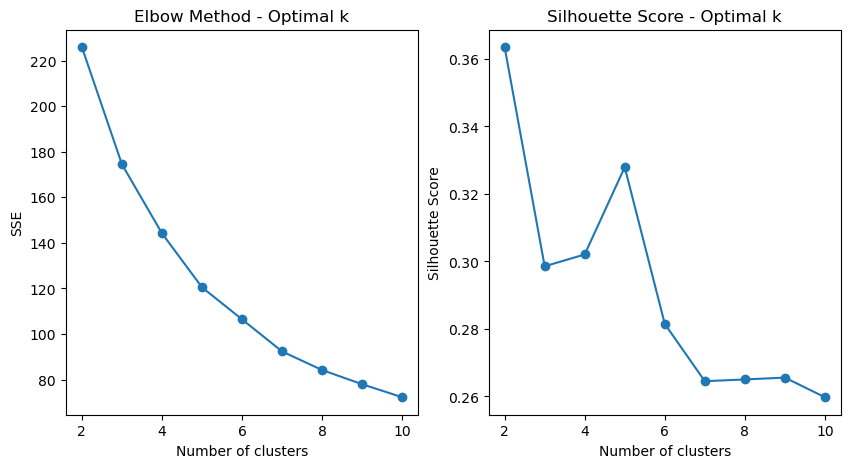

In [16]:
# 최적의 클러스터 수 찾기 (엘보우 메소드와 실루엣 점수)
def find_optimal_clusters(data):
    sse = []
    silhouette_scores = []
    k_range = range(2, 11)  # 2부터 10까지의 클러스터 개수를 테스트
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)  # SSE (Sum of Squared Errors) 저장
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))  # 실루엣 점수 저장

    # 엘보우 메소드 시각화
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(k_range, sse, marker='o')
    plt.title('Elbow Method - Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE')

    # 실루엣 점수 시각화
    plt.subplot(1, 2, 2)
    plt.plot(k_range, silhouette_scores, marker='o')
    plt.title('Silhouette Score - Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

find_optimal_clusters(scaled_data)

In [17]:
# 최적의 클러스터 개수 찾기
optimal_k = 3

# 최적의 클러스터 수로 KMeans 적용
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
grouped_df['cluster'] = kmeans.fit_predict(scaled_data)

# 클러스터링 결과 출력 (수치형 열만 선택)
numeric_columns = ['승차거리(m)', '요금', '할증여부','주행시간_초', 'cluster']
cluster_means = grouped_df[numeric_columns].groupby('cluster').mean()

/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
cluster_means

,승차거리(m),요금,할증여부,주행시간_초
cluster,,,,
0,4781.414745,7365.075550,0.059210,703.714128
1,5250.265275,8101.079292,0.403833,636.234221
2,5155.429684,7915.673449,0.042659,724.982843


# 변수중요도

In [22]:
from sklearn.ensemble import RandomForestClassifier

Feature Importance:
         Importance
할증여부       0.382649
요금         0.286235
승차거리(m)    0.183617
주행시간_초     0.147499


/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54624 (\N{HANGUL SYLLABLE HAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from curren

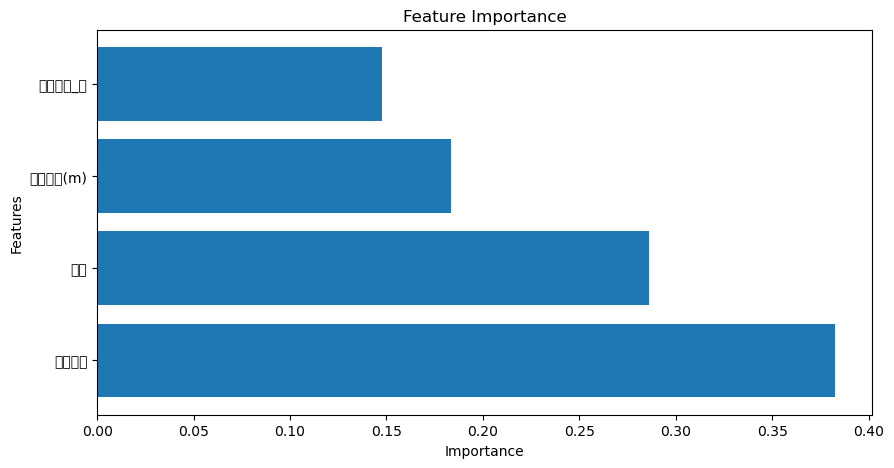

In [23]:
# 랜덤 포레스트 모델 훈련
rf = RandomForestClassifier(random_state=42)
rf.fit(grouped_df[features], grouped_df['cluster'])

# 변수 중요도 추출
importance = rf.feature_importances_

# 변수 중요도 데이터프레임 생성
importance_df = pd.DataFrame(importance, index=features, columns=['Importance']).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(importance_df)

# 변수 중요도 시각화
plt.figure(figsize=(10, 5))
plt.barh(importance_df.index, importance_df['Importance'])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()